<a href="https://colab.research.google.com/github/ZahibVentura/Simulaci-n-1/blob/main/Aguja_de_Buffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Solució analítica

Estimación de $π$ usando el Experimento de la Aguja de Buffon

El experimento de la aguja de Buffon es un método probabilístico clásico para estimar el valor de $π$\
Consiste en lanzar una aguja de longitud $L$ sobre una superficie con líneas paralelas separadas por una distancia $D$ y $θ$ un ángulo entre 0 y $π$.\

Además eñ hecho de que la v.a $X$ va de 0 a $\frac{D}{2}$

La probabilidad $P$ de que la aguja cruce una línea es dada por:
$$ P = \frac{2}{Dπ} ∫_{0}^{π} \frac{L}{2} sen(θ) dθ $$
$$ P = \frac{L}{Dπ} [-cos(θ)]_{0}^{π} $$
$$ P = \frac{2L}{Dπ} $$

y así apriximar $π$ como:

$$ π ≈ \frac{2LN}{XD} $$

con $X$: número de cruces y $N$: total de lanzamientos.

Por simulación esto es:

.Lanza una aguja de longitud $L$ un total $N$ de veces.\
.Cuenta el número de veces $X$ que la aguja cruza una línea.\
.Calcula la estimación de $π$ usando la fórmula anterior.

In [5]:
import numpy as np
import random as rd   #importamos las librerias a ocupar
import matplotlib.pyplot as plt

In [6]:
def buffon(N, L, D):
    cruses = 0
    for _ in range(N):
        # La distancia desde el centro de la aguja a la línea más cercana
        y = rd.uniform(0, D/2)
        # El ángulo que forma la aguja con las líneas paralelas
        theta = rd.uniform(0, np.pi/2)
        # Contar si la aguja cruza la línea
        if y <= (L / 2) * np.sin(theta):
            cruses += 1
    # Estimar pi usando la fórmula
    if cruses == 0:
        return 0  # Evitar división por cero
    pi_estimado = (2 * L * N) / (cruses * D)
    return pi_estimado

In [7]:
def estimacion(N, L, D):
    lis = []
    for i in range(1, N + 1):
        pi_est = buffon(i, L, D)
        lis.append(pi_est)
    return lis

In [16]:
N = 500
L = 1  # Longitud de la aguja
D = 1  # Distancia entre las líneas
G = estimacion(N, L, D)

In [17]:
print("pi: ", G[-1])

pi:  3.1055900621118013


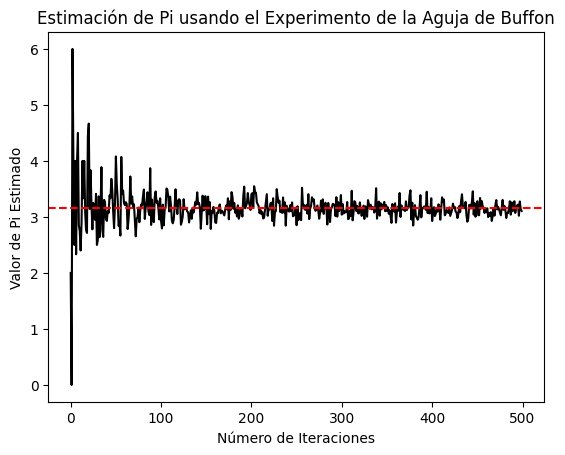

In [22]:
# Graficar la estimación de Pi
plt.plot(G,color='k')

# Cálculo de la media y desviación estándar
media = np.mean(G)
desviacion_estandar = np.std(G)

# Graficar la media
plt.axhline(y=media, color='r', linestyle='--', label=f'Media = {media:.4f}')



# Agregar etiquetas y leyenda
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor de Pi Estimado')
plt.title('Estimación de Pi usando el Experimento de la Aguja de Buffon')

plt.show()

In [23]:
def simulacion(M, N, L, D):
    r = []
    for i in range(M):
        R = buffon(N, L, D)
        r.append(R)  # Guardar solo el último valor de cada estimación
    return r

In [24]:
# Realizar 5000 simulaciones con 1000 iteraciones cada una
M = 5000
N = 1000
S = simulacion(M, N, L, D)

# Calcular la media y desviación estándar de las simulaciones
media_sim = np.mean(S)
desviacion_sim = np.std(S)

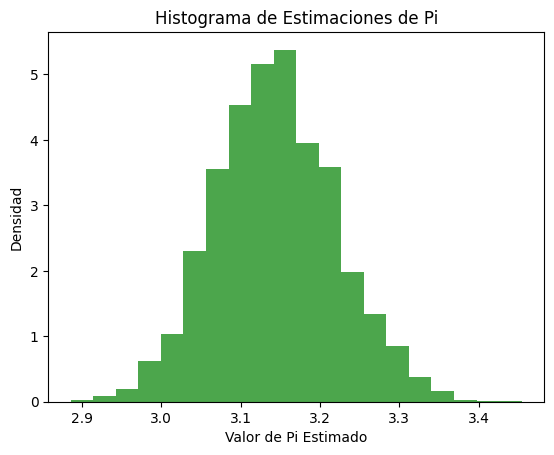

In [27]:
# Graficar el histograma de las simulaciones
plt.hist(S, bins=20,color='g', density=True, alpha=0.7)

# Agregar etiquetas y leyenda
plt.xlabel('Valor de Pi Estimado')
plt.ylabel('Densidad')
plt.title('Histograma de Estimaciones de Pi')
plt.show()